## 6.1 매개변수 갱신

### 6.1.2 확률적 경사 하강법(SGD)

In [1]:
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr

  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

### 6 1.4 모멘텀 momentum

In [6]:
import numpy as np

class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None # v = 속도 velocity

  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)

    for key in params.keys():
      self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
      params[key] += self.v[key]

### 6.1.5 AdaGrad
- 개별 매개변수에 적응적으로 학습률 조정 (맞춤형)

In [3]:
class AdaGrad:
  def __init__(self, lr=0.01):
    self.lr = lr
    self.h = None

  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val)

    for key in params.keys():
      self.h[key] += grads[key] * grads[key]
      params[key] -= self.lr*grads[key] / (np.sqrt(self.h[key] + 1e-7))

### 6.1.6 Adam

In [4]:
class Adam:

    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        lr_t  = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
        
        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
            
            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)
            
            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

### 6.1.7 매개변수 갱신방법 비교

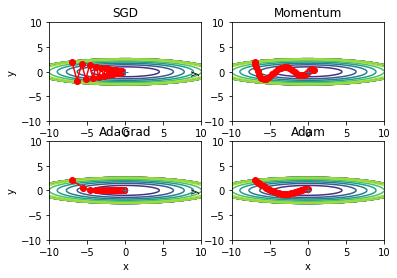

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

def f(x, y):
    return x**2 / 20.0 + y**2

def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0


optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]
    
    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])
        
        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)
    
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)
    
    X, Y = np.meshgrid(x, y) 
    Z = f(X, Y)
    
    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0
    
    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")
    
plt.show()

## 6.2 가중치의 초깃값

### 6.2.2 은닉층의 활성화값 분포

In [8]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100)
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층 5개
activations = {} # 활성화 결과값 저장

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) * 1

  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

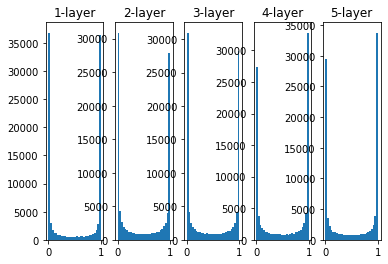

In [13]:
# histogram
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

In [17]:
for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) * 0.01

  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

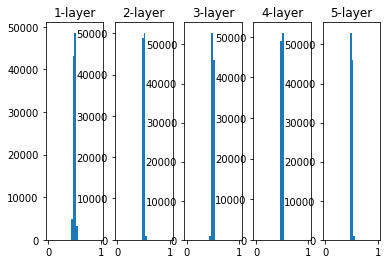

In [18]:
# histogram
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 표준편차 **1**인 경우 활성화 값 0과 1에 치우침
- 표준편차 **0.01**인 경우 활성화 값 0.5 부근에 집중 
  
  => 기울기 소실 문제 X but 다수의 뉴런이 같은 값 출력하고 있어서 다층 layer의 의미 없음

### **Xavier 초깃값 사용** = 표준편차 **1/√n**

In [19]:
x = np.random.randn(1000, 100)
node_num = 100 # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 # 은닉층 5개
activations = {} # 활성화 결과값 저장

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) / np.sqrt(node_num)

  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

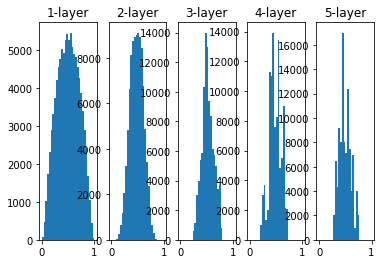

In [20]:
# histogram
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

## 6.3 배치 정규화 Batch Normalization
- 학습 속도 개선
- 초깃값에 크게 의존하지 않음
- 오버피팅 억제 (드롭아웃 등의 필요성 감소)

In [24]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [25]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx


class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        
        self.x = None
        self.original_x_shape = None
        # 가중치와 편향 매개변수의 미분
        self.dW = None
        self.db = None

    def forward(self, x):
        # 텐서 대응
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응)
        return dx


class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실함수
        self.y = None    # softmax의 출력
        self.t = None    # 정답 레이블(원-핫 인코딩 형태)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 정답 레이블이 원-핫 인코딩 형태일 때
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx


class Dropout:
    """
    http://arxiv.org/abs/1207.0580
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask


class BatchNormalization:
    """
    http://arxiv.org/abs/1502.03167
    """
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # 합성곱 계층은 4차원, 완전연결 계층은 2차원  

        # 시험할 때 사용할 평균과 분산
        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward 시에 사용할 중간 데이터
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx

In [28]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

In [29]:
class MultiLayerNetExtend:
    """완전 연결 다층 신경망(확장판)
    가중치 감소, 드롭아웃, 배치 정규화 구현
    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    weight_decay_lambda : 가중치 감소(L2 법칙)의 세기
    use_dropout : 드롭아웃 사용 여부
    dropout_ration : 드롭아웃 비율
    use_batchNorm : 배치 정규화 사용 여부
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0, 
                 use_dropout = False, dropout_ration = 0.5, use_batchnorm=False):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.use_dropout = use_dropout
        self.weight_decay_lambda = weight_decay_lambda
        self.use_batchnorm = use_batchnorm
        self.params = {}

        # 가중치 초기화
        self.__init_weight(weight_init_std)

        # 계층 생성
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            if self.use_batchnorm:
                self.params['gamma' + str(idx)] = np.ones(hidden_size_list[idx-1])
                self.params['beta' + str(idx)] = np.zeros(hidden_size_list[idx-1])
                self.layers['BatchNorm' + str(idx)] = BatchNormalization(self.params['gamma' + str(idx)], self.params['beta' + str(idx)])
                
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()
            
            if self.use_dropout:
                self.layers['Dropout' + str(idx)] = Dropout(dropout_ration)

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """가중치 초기화
        
        Parameters
        ----------
        weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
            'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
            'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLUを使う場合に推奨される初期値
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoidを使う場合に推奨される初期値
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x, train_flg=False):
        for key, layer in self.layers.items():
            if "Dropout" in key or "BatchNorm" in key:
                x = layer.forward(x, train_flg)
            else:
                x = layer.forward(x)

        return x

    def loss(self, x, t, train_flg=False):
        """손실 함수를 구한다.
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블 
        """
        y = self.predict(x, train_flg)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, X, T):
        Y = self.predict(X, train_flg=False)
        Y = np.argmax(Y, axis=1)
        if T.ndim != 1 : T = np.argmax(T, axis=1)

        accuracy = np.sum(Y == T) / float(X.shape[0])
        return accuracy

    def numerical_gradient(self, X, T):
        """기울기를 구한다(수치 미분).
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        
        Returns
        -------
        각 층의 기울기를 담은 사전(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_W = lambda W: self.loss(X, T, train_flg=True)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])
            
            if self.use_batchnorm and idx != self.hidden_layer_num+1:
                grads['gamma' + str(idx)] = numerical_gradient(loss_W, self.params['gamma' + str(idx)])
                grads['beta' + str(idx)] = numerical_gradient(loss_W, self.params['beta' + str(idx)])

        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t, train_flg=True)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.params['W' + str(idx)]
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

            if self.use_batchnorm and idx != self.hidden_layer_num+1:
                grads['gamma' + str(idx)] = self.layers['BatchNorm' + str(idx)].dgamma
                grads['beta' + str(idx)] = self.layers['BatchNorm' + str(idx)].dbeta

        return grads

============== 1/16 ==============
epoch:0 | 0.087 - 0.152


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in subtract
  after removing the cwd from sys.path.


epoch:1 | 0.097 - 0.124
epoch:2 | 0.097 - 0.152
epoch:3 | 0.097 - 0.179
epoch:4 | 0.097 - 0.198
epoch:5 | 0.097 - 0.211
epoch:6 | 0.097 - 0.227
epoch:7 | 0.097 - 0.24
epoch:8 | 0.097 - 0.259
epoch:9 | 0.097 - 0.284
epoch:10 | 0.097 - 0.29
epoch:11 | 0.097 - 0.314
epoch:12 | 0.097 - 0.33
epoch:13 | 0.097 - 0.336
epoch:14 | 0.097 - 0.35
epoch:15 | 0.097 - 0.359
epoch:16 | 0.097 - 0.385
epoch:17 | 0.097 - 0.395
epoch:18 | 0.097 - 0.409


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.433
============== 2/16 ==============
epoch:0 | 0.105 - 0.075


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:95: RuntimeWarning: overflow encountered in square


epoch:1 | 0.097 - 0.099
epoch:2 | 0.097 - 0.129
epoch:3 | 0.097 - 0.154
epoch:4 | 0.097 - 0.183
epoch:5 | 0.097 - 0.207
epoch:6 | 0.097 - 0.233
epoch:7 | 0.097 - 0.249
epoch:8 | 0.097 - 0.286
epoch:9 | 0.097 - 0.314
epoch:10 | 0.097 - 0.34
epoch:11 | 0.097 - 0.366
epoch:12 | 0.097 - 0.385
epoch:13 | 0.097 - 0.397
epoch:14 | 0.097 - 0.432
epoch:15 | 0.097 - 0.452
epoch:16 | 0.097 - 0.471
epoch:17 | 0.097 - 0.475
epoch:18 | 0.097 - 0.495


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.519
============== 3/16 ==============
epoch:0 | 0.086 - 0.092
epoch:1 | 0.353 - 0.109
epoch:2 | 0.489 - 0.122
epoch:3 | 0.584 - 0.171
epoch:4 | 0.663 - 0.218
epoch:5 | 0.722 - 0.25
epoch:6 | 0.763 - 0.292
epoch:7 | 0.801 - 0.318
epoch:8 | 0.815 - 0.343
epoch:9 | 0.86 - 0.369
epoch:10 | 0.882 - 0.396
epoch:11 | 0.904 - 0.428
epoch:12 | 0.911 - 0.447
epoch:13 | 0.937 - 0.463
epoch:14 | 0.945 - 0.491
epoch:15 | 0.951 - 0.51
epoch:16 | 0.96 - 0.532
epoch:17 | 0.962 - 0.558
epoch:18 | 0.969 - 0.573


No handles with labels found to put in legend.


epoch:19 | 0.973 - 0.593
============== 4/16 ==============
epoch:0 | 0.074 - 0.088
epoch:1 | 0.2 - 0.088
epoch:2 | 0.345 - 0.117
epoch:3 | 0.451 - 0.196
epoch:4 | 0.524 - 0.291
epoch:5 | 0.564 - 0.366
epoch:6 | 0.623 - 0.423
epoch:7 | 0.655 - 0.488
epoch:8 | 0.679 - 0.536
epoch:9 | 0.697 - 0.573
epoch:10 | 0.702 - 0.609
epoch:11 | 0.718 - 0.628
epoch:12 | 0.75 - 0.65
epoch:13 | 0.76 - 0.671
epoch:14 | 0.761 - 0.697
epoch:15 | 0.786 - 0.71
epoch:16 | 0.796 - 0.721
epoch:17 | 0.802 - 0.727
epoch:18 | 0.828 - 0.76


No handles with labels found to put in legend.


epoch:19 | 0.829 - 0.767
============== 5/16 ==============
epoch:0 | 0.125 - 0.095
epoch:1 | 0.127 - 0.128
epoch:2 | 0.133 - 0.272
epoch:3 | 0.136 - 0.424
epoch:4 | 0.149 - 0.51
epoch:5 | 0.16 - 0.588
epoch:6 | 0.17 - 0.651
epoch:7 | 0.179 - 0.686
epoch:8 | 0.195 - 0.732
epoch:9 | 0.216 - 0.753
epoch:10 | 0.228 - 0.782
epoch:11 | 0.248 - 0.798
epoch:12 | 0.248 - 0.822
epoch:13 | 0.253 - 0.838
epoch:14 | 0.258 - 0.851
epoch:15 | 0.246 - 0.863
epoch:16 | 0.258 - 0.874
epoch:17 | 0.265 - 0.885
epoch:18 | 0.276 - 0.893


No handles with labels found to put in legend.


epoch:19 | 0.291 - 0.896
============== 6/16 ==============
epoch:0 | 0.101 - 0.105
epoch:1 | 0.119 - 0.232
epoch:2 | 0.115 - 0.489
epoch:3 | 0.116 - 0.622
epoch:4 | 0.128 - 0.704
epoch:5 | 0.132 - 0.751
epoch:6 | 0.142 - 0.792
epoch:7 | 0.127 - 0.817
epoch:8 | 0.117 - 0.839
epoch:9 | 0.117 - 0.853
epoch:10 | 0.116 - 0.868
epoch:11 | 0.117 - 0.882
epoch:12 | 0.116 - 0.892
epoch:13 | 0.117 - 0.902
epoch:14 | 0.117 - 0.924
epoch:15 | 0.117 - 0.936
epoch:16 | 0.117 - 0.939
epoch:17 | 0.117 - 0.942
epoch:18 | 0.117 - 0.95


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.955
============== 7/16 ==============
epoch:0 | 0.105 - 0.119
epoch:1 | 0.116 - 0.31
epoch:2 | 0.116 - 0.59
epoch:3 | 0.116 - 0.687
epoch:4 | 0.116 - 0.749
epoch:5 | 0.116 - 0.776
epoch:6 | 0.116 - 0.822
epoch:7 | 0.116 - 0.871
epoch:8 | 0.116 - 0.89
epoch:9 | 0.116 - 0.909
epoch:10 | 0.116 - 0.926
epoch:11 | 0.116 - 0.945
epoch:12 | 0.116 - 0.947
epoch:13 | 0.116 - 0.958
epoch:14 | 0.116 - 0.974
epoch:15 | 0.116 - 0.98
epoch:16 | 0.116 - 0.984
epoch:17 | 0.116 - 0.987
epoch:18 | 0.116 - 0.991


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.993
============== 8/16 ==============
epoch:0 | 0.116 - 0.072
epoch:1 | 0.116 - 0.469
epoch:2 | 0.116 - 0.538
epoch:3 | 0.116 - 0.656
epoch:4 | 0.116 - 0.765
epoch:5 | 0.116 - 0.827
epoch:6 | 0.116 - 0.89
epoch:7 | 0.116 - 0.929
epoch:8 | 0.116 - 0.941
epoch:9 | 0.116 - 0.957
epoch:10 | 0.116 - 0.972
epoch:11 | 0.116 - 0.978
epoch:12 | 0.117 - 0.983
epoch:13 | 0.117 - 0.989
epoch:14 | 0.117 - 0.997
epoch:15 | 0.117 - 0.997
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.117 - 1.0
============== 9/16 ==============
epoch:0 | 0.1 - 0.104
epoch:1 | 0.116 - 0.597
epoch:2 | 0.116 - 0.799
epoch:3 | 0.116 - 0.869
epoch:4 | 0.116 - 0.909
epoch:5 | 0.116 - 0.951
epoch:6 | 0.116 - 0.974
epoch:7 | 0.116 - 0.986
epoch:8 | 0.116 - 0.99
epoch:9 | 0.116 - 0.993
epoch:10 | 0.116 - 0.995
epoch:11 | 0.116 - 1.0
epoch:12 | 0.116 - 1.0
epoch:13 | 0.116 - 1.0
epoch:14 | 0.117 - 1.0
epoch:15 | 0.117 - 1.0
epoch:16 | 0.117 - 1.0
epoch:17 | 0.117 - 1.0
epoch:18 | 0.117 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.116 - 1.0
============== 10/16 ==============
epoch:0 | 0.099 - 0.108
epoch:1 | 0.117 - 0.547
epoch:2 | 0.117 - 0.787
epoch:3 | 0.117 - 0.85
epoch:4 | 0.117 - 0.897
epoch:5 | 0.117 - 0.939
epoch:6 | 0.116 - 0.92
epoch:7 | 0.117 - 0.924
epoch:8 | 0.116 - 0.974
epoch:9 | 0.116 - 0.984
epoch:10 | 0.116 - 0.991
epoch:11 | 0.116 - 0.99
epoch:12 | 0.116 - 0.992
epoch:13 | 0.116 - 0.997
epoch:14 | 0.116 - 0.998
epoch:15 | 0.116 - 0.998
epoch:16 | 0.116 - 0.999
epoch:17 | 0.116 - 0.999
epoch:18 | 0.116 - 0.998


No handles with labels found to put in legend.


epoch:19 | 0.116 - 1.0
============== 11/16 ==============
epoch:0 | 0.099 - 0.174
epoch:1 | 0.105 - 0.591
epoch:2 | 0.117 - 0.646
epoch:3 | 0.116 - 0.79
epoch:4 | 0.116 - 0.79
epoch:5 | 0.116 - 0.844
epoch:6 | 0.116 - 0.811
epoch:7 | 0.116 - 0.87
epoch:8 | 0.117 - 0.883
epoch:9 | 0.117 - 0.888
epoch:10 | 0.117 - 0.895
epoch:11 | 0.117 - 0.898
epoch:12 | 0.117 - 0.829
epoch:13 | 0.117 - 0.9
epoch:14 | 0.116 - 0.891
epoch:15 | 0.116 - 0.901
epoch:16 | 0.116 - 0.902
epoch:17 | 0.116 - 0.903
epoch:18 | 0.116 - 0.902


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.902
============== 12/16 ==============
epoch:0 | 0.1 - 0.097
epoch:1 | 0.117 - 0.259
epoch:2 | 0.117 - 0.506
epoch:3 | 0.117 - 0.42
epoch:4 | 0.117 - 0.629
epoch:5 | 0.117 - 0.583
epoch:6 | 0.117 - 0.68
epoch:7 | 0.117 - 0.668
epoch:8 | 0.117 - 0.695
epoch:9 | 0.117 - 0.711
epoch:10 | 0.117 - 0.768
epoch:11 | 0.117 - 0.783
epoch:12 | 0.117 - 0.787
epoch:13 | 0.117 - 0.734
epoch:14 | 0.117 - 0.796
epoch:15 | 0.117 - 0.792
epoch:16 | 0.117 - 0.807
epoch:17 | 0.117 - 0.81
epoch:18 | 0.117 - 0.805


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.811
============== 13/16 ==============
epoch:0 | 0.116 - 0.15
epoch:1 | 0.116 - 0.164
epoch:2 | 0.117 - 0.462
epoch:3 | 0.117 - 0.483
epoch:4 | 0.117 - 0.487
epoch:5 | 0.116 - 0.582
epoch:6 | 0.116 - 0.571
epoch:7 | 0.117 - 0.599
epoch:8 | 0.116 - 0.577
epoch:9 | 0.116 - 0.606
epoch:10 | 0.116 - 0.599
epoch:11 | 0.116 - 0.602
epoch:12 | 0.116 - 0.6
epoch:13 | 0.116 - 0.586
epoch:14 | 0.116 - 0.613
epoch:15 | 0.116 - 0.615
epoch:16 | 0.116 - 0.615
epoch:17 | 0.116 - 0.615
epoch:18 | 0.116 - 0.617


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.617
============== 14/16 ==============
epoch:0 | 0.117 - 0.196
epoch:1 | 0.117 - 0.314
epoch:2 | 0.116 - 0.458
epoch:3 | 0.116 - 0.415
epoch:4 | 0.116 - 0.5
epoch:5 | 0.116 - 0.488
epoch:6 | 0.116 - 0.506
epoch:7 | 0.117 - 0.515
epoch:8 | 0.117 - 0.521
epoch:9 | 0.117 - 0.521
epoch:10 | 0.117 - 0.502
epoch:11 | 0.117 - 0.528
epoch:12 | 0.117 - 0.523
epoch:13 | 0.116 - 0.528
epoch:14 | 0.116 - 0.522
epoch:15 | 0.116 - 0.518
epoch:16 | 0.116 - 0.556
epoch:17 | 0.116 - 0.597
epoch:18 | 0.117 - 0.62


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.608
============== 15/16 ==============
epoch:0 | 0.116 - 0.124
epoch:1 | 0.105 - 0.353
epoch:2 | 0.117 - 0.399
epoch:3 | 0.117 - 0.487
epoch:4 | 0.116 - 0.499
epoch:5 | 0.116 - 0.511
epoch:6 | 0.116 - 0.506
epoch:7 | 0.117 - 0.483
epoch:8 | 0.117 - 0.517
epoch:9 | 0.117 - 0.521
epoch:10 | 0.117 - 0.525
epoch:11 | 0.117 - 0.517
epoch:12 | 0.117 - 0.584
epoch:13 | 0.117 - 0.523
epoch:14 | 0.117 - 0.613
epoch:15 | 0.117 - 0.612
epoch:16 | 0.117 - 0.612
epoch:17 | 0.117 - 0.616
epoch:18 | 0.117 - 0.573


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.622
============== 16/16 ==============
epoch:0 | 0.097 - 0.154
epoch:1 | 0.117 - 0.212
epoch:2 | 0.117 - 0.393
epoch:3 | 0.117 - 0.423
epoch:4 | 0.117 - 0.409
epoch:5 | 0.117 - 0.42
epoch:6 | 0.117 - 0.425
epoch:7 | 0.117 - 0.427
epoch:8 | 0.117 - 0.431
epoch:9 | 0.117 - 0.431
epoch:10 | 0.117 - 0.424
epoch:11 | 0.117 - 0.43
epoch:12 | 0.117 - 0.433
epoch:13 | 0.117 - 0.432
epoch:14 | 0.117 - 0.53
epoch:15 | 0.117 - 0.53
epoch:16 | 0.117 - 0.529
epoch:17 | 0.117 - 0.516
epoch:18 | 0.117 - 0.525
epoch:19 | 0.117 - 0.53


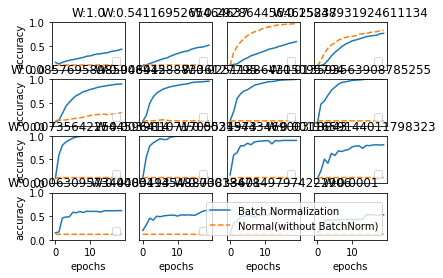

In [30]:
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)
    
    train_acc_list = []
    bn_train_acc_list = []
    
    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0
    
    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]
    
        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)
    
        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)
    
            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))
    
            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break
                
    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()

## 6.4 바른 학습을 위해

### 6.4.1 오버피팅
- 매개변수가 많고 표현력이 높은 모델
- 훈련 데이터가 적은 모델

In [32]:
class MultiLayerNet:
    """완전연결 다층 신경망
    Parameters
    ----------
    input_size : 입력 크기（MNIST의 경우엔 784）
    hidden_size_list : 각 은닉층의 뉴런 수를 담은 리스트（e.g. [100, 100, 100]）
    output_size : 출력 크기（MNIST의 경우엔 10）
    activation : 활성화 함수 - 'relu' 혹은 'sigmoid'
    weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
        'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
        'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
    weight_decay_lambda : 가중치 감소(L2 법칙)의 세기
    """
    def __init__(self, input_size, hidden_size_list, output_size,
                 activation='relu', weight_init_std='relu', weight_decay_lambda=0):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.weight_decay_lambda = weight_decay_lambda
        self.params = {}

        # 가중치 초기화
        self.__init_weight(weight_init_std)

        # 계층 생성
        activation_layer = {'sigmoid': Sigmoid, 'relu': Relu}
        self.layers = OrderedDict()
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
                                                      self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)],
            self.params['b' + str(idx)])

        self.last_layer = SoftmaxWithLoss()

    def __init_weight(self, weight_init_std):
        """가중치 초기화
        
        Parameters
        ----------
        weight_init_std : 가중치의 표준편차 지정（e.g. 0.01）
            'relu'나 'he'로 지정하면 'He 초깃값'으로 설정
            'sigmoid'나 'xavier'로 지정하면 'Xavier 초깃값'으로 설정
        """
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])  # ReLU를 사용할 때의 권장 초깃값
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])  # sigmoid를 사용할 때의 권장 초깃값
            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
        """손실 함수를 구한다.
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블 
        
        Returns
        -------
        손실 함수의 값
        """
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]
            weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W ** 2)

        return self.last_layer.forward(y, t) + weight_decay

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        """기울기를 구한다(수치 미분).
        
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        
        Returns
        -------
        각 층의 기울기를 담은 딕셔너리(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = numerical_gradient(loss_W, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_W, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        """기울기를 구한다(오차역전파법).
        Parameters
        ----------
        x : 입력 데이터
        t : 정답 레이블
        
        Returns
        -------
        각 층의 기울기를 담은 딕셔너리(dictionary) 변수
            grads['W1']、grads['W2']、... 각 층의 가중치
            grads['b1']、grads['b2']、... 각 층의 편향
        """
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        for idx in range(1, self.hidden_layer_num+2):
            grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW + self.weight_decay_lambda * self.layers['Affine' + str(idx)].W
            grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grads

epoch:0, train acc:0.13, test acc:0.1222
epoch:1, train acc:0.17, test acc:0.1554
epoch:2, train acc:0.23, test acc:0.2003
epoch:3, train acc:0.2866666666666667, test acc:0.2281
epoch:4, train acc:0.33, test acc:0.2536
epoch:5, train acc:0.33666666666666667, test acc:0.2737
epoch:6, train acc:0.3433333333333333, test acc:0.2848
epoch:7, train acc:0.36333333333333334, test acc:0.3027
epoch:8, train acc:0.36666666666666664, test acc:0.2989
epoch:9, train acc:0.36333333333333334, test acc:0.3001
epoch:10, train acc:0.38333333333333336, test acc:0.308
epoch:11, train acc:0.3933333333333333, test acc:0.3242
epoch:12, train acc:0.43, test acc:0.3297
epoch:13, train acc:0.4866666666666667, test acc:0.3611
epoch:14, train acc:0.49, test acc:0.3689
epoch:15, train acc:0.5433333333333333, test acc:0.3854
epoch:16, train acc:0.5366666666666666, test acc:0.3917
epoch:17, train acc:0.5466666666666666, test acc:0.3969
epoch:18, train acc:0.5433333333333333, test acc:0.3991
epoch:19, train acc:0.5533

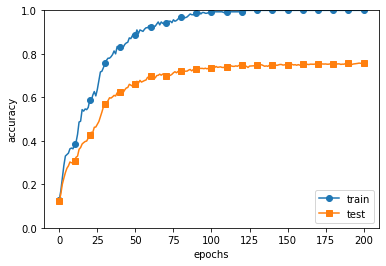

In [34]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우

# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 6.4.2 가중치 감소

epoch:0, train acc:0.12333333333333334, test acc:0.0967
epoch:1, train acc:0.13333333333333333, test acc:0.1156
epoch:2, train acc:0.16333333333333333, test acc:0.1379
epoch:3, train acc:0.18333333333333332, test acc:0.1538
epoch:4, train acc:0.21666666666666667, test acc:0.1761
epoch:5, train acc:0.23, test acc:0.1946
epoch:6, train acc:0.25333333333333335, test acc:0.2101
epoch:7, train acc:0.2833333333333333, test acc:0.2297
epoch:8, train acc:0.3233333333333333, test acc:0.2459
epoch:9, train acc:0.3233333333333333, test acc:0.261
epoch:10, train acc:0.33666666666666667, test acc:0.271
epoch:11, train acc:0.3433333333333333, test acc:0.2832
epoch:12, train acc:0.37, test acc:0.2997
epoch:13, train acc:0.38, test acc:0.3064
epoch:14, train acc:0.39666666666666667, test acc:0.3154
epoch:15, train acc:0.39666666666666667, test acc:0.3252
epoch:16, train acc:0.41333333333333333, test acc:0.3352
epoch:17, train acc:0.4266666666666667, test acc:0.351
epoch:18, train acc:0.436666666666666

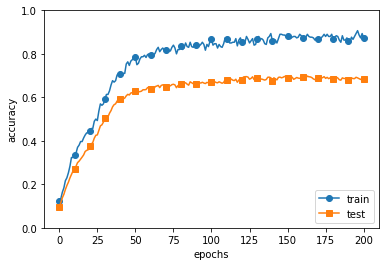

In [33]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0.1

# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

### 6.4.3 드롭아웃

In [35]:
class RMSprop:

    def __init__(self, lr=0.01, decay_rate = 0.99):
        self.lr = lr
        self.decay_rate = decay_rate
        self.h = None
        
    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

class Nesterov:
    # NAG는 모멘텀에서 한 단계 발전한 방법이다. (http://newsight.tistory.com/224)
    
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
            
        for key in params.keys():
            self.v[key] *= self.momentum
            self.v[key] -= self.lr * grads[key]
            params[key] += self.momentum * self.momentum * self.v[key]
            params[key] -= (1 + self.momentum) * self.lr * grads[key]

In [36]:
class Trainer:
    """신경망 훈련을 대신 해주는 클래스
    """
    def __init__(self, network, x_train, t_train, x_test, t_test,
                 epochs=20, mini_batch_size=100,
                 optimizer='SGD', optimizer_param={'lr':0.01}, 
                 evaluate_sample_num_per_epoch=None, verbose=True):
        self.network = network
        self.verbose = verbose
        self.x_train = x_train
        self.t_train = t_train
        self.x_test = x_test
        self.t_test = t_test
        self.epochs = epochs
        self.batch_size = mini_batch_size
        self.evaluate_sample_num_per_epoch = evaluate_sample_num_per_epoch

        # optimzer
        optimizer_class_dict = {'sgd':SGD, 'momentum':Momentum, 'nesterov':Nesterov,
                                'adagrad':AdaGrad, 'rmsprpo':RMSprop, 'adam':Adam}
        self.optimizer = optimizer_class_dict[optimizer.lower()](**optimizer_param)
        
        self.train_size = x_train.shape[0]
        self.iter_per_epoch = max(self.train_size / mini_batch_size, 1)
        self.max_iter = int(epochs * self.iter_per_epoch)
        self.current_iter = 0
        self.current_epoch = 0
        
        self.train_loss_list = []
        self.train_acc_list = []
        self.test_acc_list = []

    def train_step(self):
        batch_mask = np.random.choice(self.train_size, self.batch_size)
        x_batch = self.x_train[batch_mask]
        t_batch = self.t_train[batch_mask]
        
        grads = self.network.gradient(x_batch, t_batch)
        self.optimizer.update(self.network.params, grads)
        
        loss = self.network.loss(x_batch, t_batch)
        self.train_loss_list.append(loss)
        if self.verbose: print("train loss:" + str(loss))
        
        if self.current_iter % self.iter_per_epoch == 0:
            self.current_epoch += 1
            
            x_train_sample, t_train_sample = self.x_train, self.t_train
            x_test_sample, t_test_sample = self.x_test, self.t_test
            if not self.evaluate_sample_num_per_epoch is None:
                t = self.evaluate_sample_num_per_epoch
                x_train_sample, t_train_sample = self.x_train[:t], self.t_train[:t]
                x_test_sample, t_test_sample = self.x_test[:t], self.t_test[:t]
                
            train_acc = self.network.accuracy(x_train_sample, t_train_sample)
            test_acc = self.network.accuracy(x_test_sample, t_test_sample)
            self.train_acc_list.append(train_acc)
            self.test_acc_list.append(test_acc)

            if self.verbose: print("=== epoch:" + str(self.current_epoch) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc) + " ===")
        self.current_iter += 1

    def train(self):
        for i in range(self.max_iter):
            self.train_step()

        test_acc = self.network.accuracy(self.x_test, self.t_test)

        if self.verbose:
            print("=============== Final Test Accuracy ===============")
            print("test acc:" + str(test_acc))

train loss:2.3488751119693045
=== epoch:1, train acc:0.13666666666666666, test acc:0.1212 ===
train loss:2.3106274807478457
train loss:2.3051817174699893
train loss:2.329401023261175
=== epoch:2, train acc:0.14333333333333334, test acc:0.1238 ===
train loss:2.306772303905727
train loss:2.302478751544235
train loss:2.2872561336878685
=== epoch:3, train acc:0.15, test acc:0.1271 ===
train loss:2.297118074769157
train loss:2.306055040338679
train loss:2.286200409160384
=== epoch:4, train acc:0.15333333333333332, test acc:0.133 ===
train loss:2.272763510038813
train loss:2.3003229331029065
train loss:2.284579296486398
=== epoch:5, train acc:0.16, test acc:0.1377 ===
train loss:2.277320928045421
train loss:2.342665244583245
train loss:2.29580866587005
=== epoch:6, train acc:0.16333333333333333, test acc:0.1405 ===
train loss:2.2904078590211405
train loss:2.292884969515834
train loss:2.3022189937066053
=== epoch:7, train acc:0.17, test acc:0.1438 ===
train loss:2.274802142356476
train loss:2

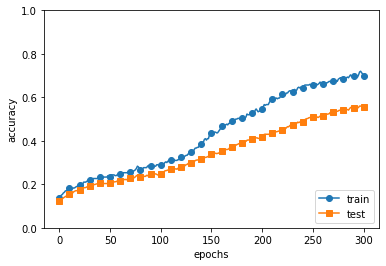

In [37]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()